<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 1 </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des librairies</h3>
</div>

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des données</h3>
</div>

In [80]:
customers = pd.read_csv("../data/olist_customers_dataset.csv")
geolocation = pd.read_csv("../data/olist_geolocation_dataset.csv")
items = pd.read_csv("../data/olist_order_items_dataset.csv")
payments = pd.read_csv("../data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("../data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("../data/olist_orders_dataset.csv")
products = pd.read_csv("../data/olist_products_dataset.csv")
sellers = pd.read_csv("../data/olist_sellers_dataset.csv")
translate = pd.read_csv("../data/product_category_name_translation.csv")

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; "> Traduction des produits </h3>
</div>

In [81]:
translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [82]:
translate_mapper = dict(zip(translate.product_category_name, translate.product_category_name_english))

In [83]:
products['product_category_name'] = products.product_category_name.map(translate_mapper)

In [84]:
products.product_category_name.head()

0         perfumery
1               art
2    sports_leisure
3              baby
4        housewares
Name: product_category_name, dtype: object

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Création de la Dataframe initiale</h3>
</div>

In [85]:
df = pd.merge(customers, orders, on = "customer_id", how = "inner")
df = pd.merge(pd.merge(df, items, on = "order_id", how='inner'), products, on = "product_id", how="inner")
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Recency</h3>
</div>

**Nous allons créer une colonne qui va nous permettre de savoir combien de jour s'est écouler entre la dernière commande d'un client par rapport à la dernière commande du dernier client.**

In [86]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112650 non-null  object        
 1   customer_unique_id             112650 non-null  object        
 2   customer_zip_code_prefix       112650 non-null  int64         
 3   customer_city                  112650 non-null  object        
 4   customer_state                 112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

In [88]:
df.describe(include="all")

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_516\1985922364.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_516\1985922364.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_516\1985922364.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\utilisateur\AppData\Local\Temp\

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650,112650,112650.000000,112650,112650,112650,112650,112650,112635,111456,...,112650.000000,112650.000000,111023,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
unique,98666,95420,NaN,4110,27,98666,7,98112,90174,81017,...,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,...,NaN,NaN,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,24,NaN,17808,47449,21,110197,21,23,48,...,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35119.309090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,NaN,NaN,29866.120801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000


In [89]:
df_max_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
df_max_purchase.columns = ['customer_unique_id', 'MaxPurchaseDate']

df_max_purchase.head()

,customer_unique_id,MaxPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [90]:
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days

In [91]:
df_max_purchase

,customer_unique_id,MaxPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292
...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123


In [92]:
df_max_purchase['Recency'].describe()

count    95420.000000
mean       242.600377
std        153.160320
min          0.000000
25%        118.000000
50%        223.000000
75%        352.000000
max        728.000000
Name: Recency, dtype: float64

Sur nos 95420 clients différents : 

    -En moyenne leurs dernières commandes était il y a 243 jour
    -Au plus tard il y a 728 jours
    -Et la médianne se trouve à 223 jours

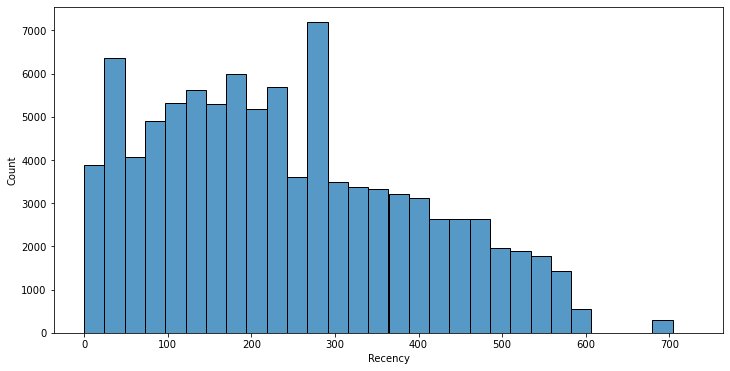

In [93]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_max_purchase['Recency'], bins=30)
plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Frequence </h3>
</div>

**Nous calculons la fréquence de commande d'un client.**

In [94]:
df_frequency = df.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_frequency.columns = ['customer_unique_id','order_purchase_timestamp']

df_frequency.describe()

,order_purchase_timestamp
count,95420.00000
mean,1.18057
std,0.62145
min,1.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,24.00000


**il y a au total 95420 clients.</br>
la moyennes est de 1.18.</br>
écart-type est de 0.6214.</br>
la mediane nous montre que les clients ne commande qu'une seule fois.</br>
75 pourcent des clients ne commande que 1 seule fois.</br>
et au maximum il y a 24 commandes du meme client.</br>**

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Nombre de produit et type de produit</h3>
</div>

**Nous allons maintenant voir le nombre de produit et le type de produit que commande un client.**

In [95]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:11,2018-07-17 04:31:33,2018-07-25 11:18:00,...,99.90,21.14,home_confort,32.0,373.0,1.0,1500.0,45.0,30.0,45.0
112646,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,...,19.99,10.96,pet_shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0
112647,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,...,250.00,54.11,health_beauty,40.0,1694.0,1.0,2400.0,33.0,10.0,16.0
112648,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-05 16:36:49,...,84.90,7.46,fashion_bags_accessories,29.0,498.0,4.0,300.0,16.0,16.0,11.0


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Panier Moyen </h3>
</div>

**Panier moyen par client**

In [96]:
df.order_id.value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
582ecddc80251f58adb996143e81d6e0     1
db5a3eab52ef5c18c745c172a5050809     1
96c3a40e38272781dd5b3dfc4797e8f7     1
9761d4d539165b2fedae19fe7d0f8cc8     1
51c6d2f460589fa7b65f2da51e860206     1
Name: order_id, Length: 98666, dtype: int64

In [97]:
df.order_id.value_counts().mean()

1.1417306873695092

In [98]:
df.order_id.value_counts().describe()

count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: order_id, dtype: float64

In [159]:
df_panier = df.groupby("customer_unique_id")['price'].sum().reset_index()

df_panier

,customer_unique_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,64.89
95417,ffff371b4d645b6ecea244b27531430a,89.90
95418,ffff5962728ec6157033ef9805bacc48,115.00


In [100]:
df_panier.describe()

,price
count,98666.000000
mean,125.919255
std,190.985636
min,0.850000
25%,41.990000
50%,79.000000
75%,139.900000
max,6735.000000


**il y a au total 98666 clients.</br>
la moyennes est de 125.91 Dollars </br>
écart-type est de 190.98.</br>
la mediane nous montre que les clients depense 79 Dollars.</br>
75 pourcent des clients depense 139 Dollars.</br>
et au maximum il un client a dépensé 6735 Dollars.</br>**

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Canal d'achat </h3>
</div>

In [101]:
df["nombre_vente"] = 0
df_category = df.groupby("product_category_name")['nombre_vente'].count().reset_index()

In [102]:
df_category

,product_category_name,nombre_vente
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364
...,...,...
66,stationery,2517
67,tablets_printing_image,83
68,telephony,4545
69,toys,4117


In [103]:
df_provisoire = df[["product_photos_qty","product_category_name"]]

In [104]:
df_category = pd.merge(df_category, df_provisoire, on="product_category_name", how="inner")

In [105]:
df_category.drop_duplicates(inplace=True)
df_category

,product_category_name,nombre_vente,product_photos_qty
0,agro_industry_and_commerce,212,2.0
22,agro_industry_and_commerce,212,1.0
23,agro_industry_and_commerce,212,3.0
33,agro_industry_and_commerce,212,6.0
36,agro_industry_and_commerce,212,8.0
...,...,...,...
106843,watches_gifts,5991,6.0
107303,watches_gifts,5991,7.0
108397,watches_gifts,5991,8.0
108682,watches_gifts,5991,9.0


In [106]:
df_category = df_category.groupby("product_category_name").median()

In [107]:
df_category.sort_values("nombre_vente")

,nombre_vente,product_photos_qty
product_category_name,,
security_and_services,2.0,2.5
fashion_childrens_clothes,8.0,3.5
la_cuisine,14.0,1.5
cds_dvds_musicals,14.0,2.0
arts_and_craftmanship,24.0,3.5
...,...,...
computers_accessories,7827.0,5.0
furniture_decor,8334.0,6.5
sports_leisure,8641.0,6.0


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Nombre de produit</h3>
</div>

**Nous allons voir le nombre de produit et le type de produit que commande un client**

In [108]:
df["number_product"] = 0
df_product = df.groupby(["customer_unique_id"]).number_product.count().reset_index()

In [109]:
df_product.sort_values("number_product", ascending=False).head()

,customer_unique_id,number_product
74752,c8460e4251689ba205045f3ea17884a1,24
25885,4546caea018ad8c692964e3382debd19,21
73155,c402f431464c72e27330a67f7b94d4fb,20
39443,698e1cf81d01a3d389d96145f7fa6df8,20
5741,0f5ac8d5c31de21d2f25e24be15bbffb,18


<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 2 </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des librairies</h3>
</div>

In [110]:
%env OMP_NUM_THREADS=1
import numpy as np
from sklearn.datasets import load_iris
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

env: OMP_NUM_THREADS=1


<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Recency</h2>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">K-means</h3>
</div>

Text(0, 0.5, 'Cout du modele (Inertia)')

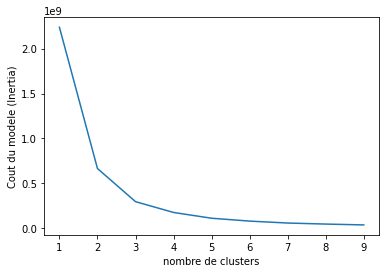

In [132]:
X = df_max_purchase[["Recency"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [133]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

,Recency,Groupe
0,115,1
1,118,1
2,541,0
3,325,4
4,292,4
...,...,...
95415,451,2
95416,266,4
95417,572,0
95418,123,1


In [134]:
type_client = model.predict(X[["Recency"]])
np.sort(type_client)
x = type_client
unique, counts = np.unique(x, return_counts=True)
x_count = np.asarray((unique, counts)).T
print(
    "Le cluster 0 contient {} clients,\n le cluster 1 contient {} clients,\n et le cluster 2 contient {} clients,\n et le cluster 3 contient {} clients,\n et le cluster 4 contient {} clients".format(
        x_count[0][1], x_count[1][1], x_count[2][1], x_count[3][1], x_count[4][1]
    )
)

Le cluster 0 contient 11737 clients,
 le cluster 1 contient 25014 clients,
 et le cluster 2 contient 15683 clients,
 et le cluster 3 contient 19939 clients,
 et le cluster 4 contient 23047 clients


In [135]:
min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

df_recency = min.assign(max = max)
df_recency.rename(columns = {"Recency":"min"}, inplace = True)
df_recency

,min,max
Groupe,,
0,452,728
1,104,210
2,326,451
3,0,103
4,211,325


**Donc on peut voir que l'on a 3 groupes de clients au niveau du Recency.**

In [136]:
matrice = np.asarray((df_recency))
print("Pour le cluster 0 les clients on commander pour la dernière fois entre {} et {} jour.\nPour le cluster 1 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 2 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 3 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 4 les clients on commander pour la dernière fois entre {} et {} jours ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[1][1], matrice[3][0], matrice[3][1], matrice[1][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour la dernière fois entre 452 et 728 jour.
Pour le cluster 1 les clients on commander pour la dernière fois entre 104 et 210 jours.
Pour le cluster 2 les clients on commander pour la dernière fois entre 326 et 451 jours.
Pour le cluster 3 les clients on commander pour la dernière fois entre 210 et 0 jours.
Pour le cluster 4 les clients on commander pour la dernière fois entre 103 et 210 jours 


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">CAH (classification ascendante hiérarchique)</h3>
</div>

In [141]:
import plotly.figure_factory as ff
from sklearn.cluster import AgglomerativeClustering

#On va faire ca sur un echantillon moitié moins grand car mon pc va exploser sinon

echantillon = df_max_purchase[["Recency"]].iloc[0:100]

fig = ff.create_dendrogram(echantillon)
fig.update_layout(width=800, height=500)
fig.show()

Il est souvent pertinent de choisir le partitionnement correspondant au plus grand saut entre deux clusters consécutifs. C'est pour cela que nous allons donc choisir 5 clusters comme nombre de clusters optimal.

In [142]:
echantillon = df_max_purchase[["Recency"]].iloc[0:500]

fig = ff.create_dendrogram(echantillon)
fig.update_layout(width=800, height=500)
fig.show()

On va devoir selectionner les 20000 premieres iteration afin de se donner un ordre d'idée des groupes car je n'ai pas suffisament de RAM pour lancer sur la totalité.

In [144]:
Recency = df_max_purchase[["Recency"]].iloc[0:20000]
y_pred = AgglomerativeClustering(n_clusters=5).fit_predict(Recency)

In [145]:
Recency["groupe"] = y_pred

In [146]:
min = Recency.groupby("groupe").min()

max = Recency.groupby("groupe").max()

Recency = min.assign(max = max)
Recency.rename(columns = {"Recency":"min"}, inplace = True)
Recency

,min,max
groupe,,
0,217,377
1,378,506
2,4,148
3,149,216
4,507,700


In [147]:
matrice = np.asarray((Recency))
print("Pour le cluster 0 les clients on commander pour la dernière fois entre {} et {} jour.\nPour le cluster 1 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 2 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 3 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 4 les clients on commander pour la dernière fois entre {} et {} jours ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[1][1], matrice[3][0], matrice[3][1], matrice[1][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour la dernière fois entre 217 et 377 jour.
Pour le cluster 1 les clients on commander pour la dernière fois entre 378 et 506 jours.
Pour le cluster 2 les clients on commander pour la dernière fois entre 4 et 148 jours.
Pour le cluster 3 les clients on commander pour la dernière fois entre 506 et 149 jours.
Pour le cluster 4 les clients on commander pour la dernière fois entre 216 et 506 jours 


Nous avons des résultats similaire au k-means mais comme nous avons dû selectionner un echantillon nous n'avons pas des résultats aussi représentatives que pour les k-means où nous avons pû utiliser toute la population

<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Application sur RFM</h2>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Kmeans</h3>
</div>

In [176]:
df_rfm = pd.merge(df_max_purchase, df_frequency, on = "customer_unique_id", how = "inner")
df_rfm = pd.merge(df_rfm, df_panier, on = "customer_unique_id", how = "inner")
df_rfm = df_rfm.drop("MaxPurchaseDate", axis = 1)
df_rfm.rename(columns={"order_purchase_timestamp":"Frequence", "price":"Montant"}, inplace = True)
df_rfm.head()

,customer_unique_id,Recency,Frequence,Montant
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


Text(0, 0.5, 'Cout du modele (Inertia)')

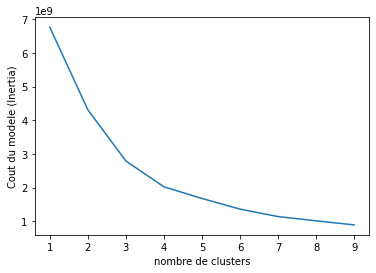

In [177]:
X = df_rfm[["Recency", "Frequence", "Montant"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [279]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

,Recency,Frequence,Montant,Groupe
0,115,1,129.90,2
1,118,1,18.90,2
2,541,1,69.00,3
3,325,1,25.99,0
4,292,1,180.00,0
...,...,...,...,...
95415,451,2,1570.00,1
95416,266,1,64.89,0
95417,572,1,89.90,3
95418,123,1,115.00,2


In [280]:
count = X.groupby("Groupe").count()

min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

mean = X.groupby("Groupe").mean()

In [286]:
X.Recency.mean(), X.Frequence.mean(), X.Montant.mean()

(242.60037727939635, 1.1805701110878222, 142.44019807180558)

In [281]:
count, min , max, mean.round(2)

(        Recency  Frequence  Montant
 Groupe                             
 0         33866      33866    33866
 1           634        634      634
 2         34445      34445    34445
 3         21256      21256    21256
 4          5219       5219     5219,
         Recency  Frequence  Montant
 Groupe                             
 0           174          1     2.29
 1             8          1  1259.00
 2             0          1     0.85
 3           357          1     3.85
 4             4          1   354.80,
         Recency  Frequence   Montant
 Groupe                              
 0           363         12    360.00
 1           696         24  13440.00
 2           180         12    399.90
 3           728         21    499.99
 4           698         18   1252.35,
         Recency  Frequence  Montant
 Groupe                             
 0        259.33       1.15   100.26
 1        243.91       1.65  1895.72
 2         91.01       1.16   103.98
 3        463.32       1.15 

Les caractère que l'on peut identifier sur nos différents groupe sont :

   - **Groupe 0** : Beaucoup de client, qui dépense moins que la moyenne (ceux qui dépense le moins), ont une fréquence    dans la moyenne, des clients dans la moyenne en terme de récence 
   - **Groupe 1** : Très peu de client, qui dépense énormement, sont ceux qui ont la fréquence la plus élevée, et une récence moyenne
   - **Groupe 2** : Beaucoup de clients, les plus récents, une fréquence dans la moyenne, un montant faible
   - **Groupe 3** : Beaucoup de clients, les moins récents, une fréquence moyenne, un montant faible
   - **Groupe 4** : Peu de clients, une récence moyenne, une fréquence forte, un montant élevé

**En résumé :**

| Groupe | Recence | Frequence | Count | Montant |
|--------|---------|-- --------|-------|---------|
| 0 | ~ | ~ | + | - |
| 1 | ~ | + | -- | ++ |
| 2 | + | ~ | + | - |
| 3 | - | ~ | + | - |
| 4 | ~ | + | - | + |

*~ = moyen*

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">CAH</h3>
</div>

In [289]:
cah_echantillon = df_rfm[["Recency", "Frequence", "Montant"]].iloc[0:500]

fig = ff.create_dendrogram(echantillon)
fig.update_layout(width=800, height=500)
fig.show()

In [288]:
df_rfm

,customer_unique_id,Recency,Frequence,Montant
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00
